# 1. sample 데이터 설명 및 분석목표

## 1) 분석목표


- **아래의 기간별, 조건별로 현재의 학습 패턴을 분석하여 무엇이 학습에 영향을 미치는지 알고싶다.**
 - 가장 많은 학습이 일어나는 요일 / 시간대 (수업시간(초)와 수업시작시간을 이용한 빈도데이터 사용)
 - 가장 적은 학습이 일어나는 요일 / 시간대 (수업시간(초)와 수업시작시간을 이용한 빈도데이터 사용)
 - 꾸준히 학습하는(1주일에 4일 이상) 집단의 평균 학습 횟수, 수업 시간
 - (옵션1) : 레벨별 영어 수업 중 Global과 Native 선호도
 - (옵션2) : 레벨별 수업 지속 시간

## 2) 데이터 설명


- 데이터는 수업이 이루어지는 시점의 정보들에 대한 실제 로그 데이터
-  2017/09/01 ~ 2017/12/31 일까지 3개월 동안의 데이터
- 칼럼:
 - 선생님 타입 : 글로벌수업(영어사용) / 네이티브수업(영미권) / chinese(중국어수업) <br>
 - 과목 : 영어/중국어<br> 
 - 수업시간(초단위) : 수업시작시간부터 끝나는 시간
 - 수업 시작시간
- 데이터양 : 95564(rows) x 6(columns)

## 3) 추가적으로 필요한 정보들

#### 분석시 예상되는 문제점에서 도출
- 사용자별 학습한 영어 레벨
- 사용자별 연령대 (대략적으로라도)
- 공휴일이 없는 4주치 데이터가 필요할 것 같음(예로 4월)

## 4) 데이터에 대해 추가 고려해볼 사항들

- **튜터의 수익 결정 요인** 
  - 수업시간은 1200초(20분)가 기본이고 180초(3분)이상 수업했을 때 수업이 이루어졌다고 판단함
  - 수업 빈도가 아닌 총 수업 시간에 따라서 분당 수업 원가 존재. 튜터는 한국 및 해외에 거주하는데 주로 해외 현지인임.
  
- **요일별 분석 시, 이상치 데이터가 섞여 있을 수 있음**
  - 추석 연휴, 주중에 하루씩 껴 있는 공휴일의 경우
  - 교육기관 측에서 프로모션 등을 진행하여 특정 시기에 수강생들이 몰림
  
- **시간대별 분석 시, 다른 주요변수와 패턴을 간과할 수 있음**
  - 요일의 특성을 배제하고 시간대만 고려 시, 유의미한 차이를 놓칠 수 있음<br>
    (ex. 접속빈도가 주중엔 저녁 6시 이후, 주말엔 낮에 몰릴 경우, 요일을 배제하고 시간대만 놓고 보면 전체적으로 고른 분포를 보이겠지만 
    실제로는 요일에 따라 분포가 크게 달라짐)
  - 편향 가능성: 학생들이 선호하는 튜터가 개인 스케쥴, 현지와 한국 간 시차 등으로 활동하는 시간대가 정해져 있다면? 
    어쩔수 없이 학생들도 그 시간대로 쏠리지 않을까?
  - 시기적 특성에 따라 시간대별 분포가 다를 수 있음 (ex. 분석 기간에 월드컵 기간이 포함된 경우, 경기가 있는 시간대엔 접속 빈도가 급감)
  - 데이터가 계절성을 가지고 있음 (ex. 여름/겨울 방학 기간에는 주간 시간대 접속이 급증)

- **꾸준한 학습 집단(주당 4일 이상) 위주 분석 시, 변수 선정 기준이 모호할 수 있음.**
  - 1주일에 4일이라는 기준의 모호성. 1시간씩 4일 학습자와 3시간씩 3일 학습자라면 후자가 더 상위그룹 아닐까? 
  - 꾸준한 학습자들은 학습 횟수나 시간대 보다 학습 참여도에 영향을 끼치는 더 중요한 변수가 있을 수 있음 
    (ex. 튜터가 누구냐에 따라 학습빈도가 달라질 수도)
    
- **학생, 교사의 개인사정,  인터넷 오류 등의 문제로 한 학생이 한 선생님과 연이어 여러 번 연결되는 경우가 다수 발견됨**
  - 빈도수에 따라 수업의 많고 적음을 판단하기 어려움
  - 수업시간에 따라 수업의 많고 적음을 판단하고자 할 땐 같은 학생이 동일한 튜터를 연이어 선택하여 수업한 것을 병합하는 등 
    전처리 작업이 필요하다고 판단됨<br><br>
    ex)<br>
    <동일 학생의 데이터><br>
    학생 idx  튜터 idx   튜터타입   수업 시간(초)   수업 시작시간<br>
    203736   381   Global   250   2017-11-16 11:25<br>
    203736   381   Global   288   2017-11-16 12:00<br>
    203736   381   Global   339   2017-11-16 13:22<br>
    203736   381   Global   413   2017-11-16 13:28<br>
    203736   381   Global   1201   2017-11-17 16:10<br>
    203736   381   Global   296   2017-11-17 16:30<br>
    203736   381   Global   564   2017-11-23 17:03<br>
    203736   381   Global   365   2017-11-23 17:35<br>
    203736   381   Global   314   2017-11-24 12:05

# 2. 한글폰트설정



colaboratory 는 linux ubuntu 서버에서 동작(한글폰트가 설치X)

한글폰트를 다운받아서 강제로 지정해야 시각화할때 한글이 깨지지 않음.

아래 코드를 실행하면 자동으로 한글을 설치하게 됨.

보다 자세한 설명을 원하면 [여기](https://drive.google.com/open?id=1Z4wXJddBppoPF0Bs75r_iL9UqKQup3EE)를 참조.

In [1]:
! apt-get install fonts-nanum
! sudo fc-cache -fv
! cp -rf /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
! rm -rf /content/.cache/matplotlib/*
print('-' * 40)
print("한글폰트 설치완료: 런타임을 재실행하세요")

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 0 not upgraded.
Need to get 9,129 kB of archives.
After this operation, 27.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful/main amd64 fonts-nanum all 20161025-1 [9,129 kB]
Fetched 9,129 kB in 1s (5,254 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 18298 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20161025-1_all.deb ...
Unpacking fonts-nanum (20161025-1) ...
Setting up fonts-nanum (20161025-1) ...
/bin/sh: 1: sudo: not found
----------------------------------------
한글폰트 설치완료: 런타임을 재실행하세요


# 3. 구글 드라이브의 데이터 불러오기(goolge api)

colaboratory는 local에 있는 파일(즉, 개인PC나 랩탑의 파일)을 그대로 불러올수 없으며,

그 파일을 어딘가에 업로드 하여, 웹상에 올라와있는 파일의 url을 입력하던가,

구글 드라이브에 데이터 파일을 직접 업로드 한 후, 가져와야함.

구글드라이브를 이용하는 경우 구글의 파일공유 정책에 따라 로그인 및 권한 확인 절차가 필요하며,

해당사항은 아래와 같이 진행하면 됨.

파일을 업로드 하더라도, 무슨 파일을 불러올 지 모르기 때문에

file id를 넣어 지정해야함. [여기](https://drive.google.com/open?id=1mdaxfa161UhvgNGKTtmC0gFS1EJpXDru) 를 참고.

In [1]:
# for google autorization
from google.colab import auth
auth.authenticate_user()
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')


# download data to python
file_id = '1iFbS6y-etqb1aTB7iGX6kPPlQLA8kkns'           # 여기 이 줄의  ' ' 사이에 file id를 넣어야 합니다.
import io
from googleapiclient.http import MediaIoBaseDownload
request = drive_service.files().get_media(fileId=file_id)
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
  _, done = downloader.next_chunk()  
downloaded.seek(0)

print('complete')

complete


# 4. Import libraries

제일 처음 해야할 건 분석에 사용할 다양한 라이브러리들을 불러오기

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc
rc('font',family='NanumBarunGothic')
import seaborn as sns
%matplotlib inline
! pip install xlrd          # 엑셀 파일 파싱용 라이브러리, 이 서버에 없으므로 pip를 이용해서 설치하고 import 합시다
import xlrd

print('All libraries are loaded')

    100% |████████████████████████████████| 112kB 4.4MB/s 
All libraries are loaded


# 5. pandas로 데이터 불러오기 및 전처리

## 1) 데이터 파싱, 데이터 확인

분석 목표에 시간대별 분석이 있으므로, 데이터를 time series 데이터로 만들면 편해짐

따라서 parsing 할때 아예 칼럼중에 수업시작시간을 index로 만들어 버리게 되면, 자동으로 time series 데이터가 됨

자세한 진행은 아래를 확인

In [0]:
data = pd.read_excel(downloaded, sheet_name = 0, encoding = 'utf-8', skiprows = 4, usecols = "B:F", index_col = '수업 시작시간', parse_date = True)
data.head()

In [21]:
data.head()

,학생 idx,튜터 idx,튜터타입,수업 시간(초)
수업 시작시간,,,,
2017-09-01 00:01:03,122633,530,Native,0.0
2017-09-01 00:02:42,23545,33082,Global,1201.0
2017-09-01 00:02:52,48258,31107,Global,1201.0
2017-09-01 00:06:30,122633,530,Native,1202.0
2017-09-01 00:06:30,112318,66655,Global,1198.0


## 2) 데이터에 문제는 없는가? : 각 칼럼별 data type 확인하기

In [4]:
df = data.copy()
df.dtypes

학생 idx        int64
튜터 idx        int64
튜터타입         object
수업 시간(초)    float64
dtype: object

## 3) missing value(NaN, Null)가 있는가?

In [5]:
df.isnull().sum()

학생 idx         0
튜터 idx         0
튜터타입           0
수업 시간(초)    1605
dtype: int64

## 4) missing value, 날려버리기

In [6]:
df2 = df.copy().dropna()
df2.head()

,학생 idx,튜터 idx,튜터타입,수업 시간(초)
수업 시작시간,,,,
2017-09-01 00:01:03,122633,530,Native,0.0
2017-09-01 00:02:42,23545,33082,Global,1201.0
2017-09-01 00:02:52,48258,31107,Global,1201.0
2017-09-01 00:06:30,122633,530,Native,1202.0
2017-09-01 00:06:30,112318,66655,Global,1198.0


## 5) 데이터 요약: 데이터는 어떠한 형태 파악
- 분석 전에 반드시 이렇게 기초통계를 반드시 뽑아야 함.

In [7]:
df2.describe()

,학생 idx,튜터 idx,수업 시간(초)
count,93959.000000,93959.000000,93959.000000
mean,143536.675646,81687.356028,748.914143
std,76973.835313,67337.012886,540.672849
min,555.000000,371.000000,0.000000
25%,71597.000000,24662.000000,94.000000
50%,155953.000000,62215.000000,902.000000
75%,196345.000000,159487.000000,1201.000000
max,324817.000000,306215.000000,2414.000000


## 6) 문제점 발견: 수업시간이 0인것도 있다 - 어떻게 할것인가?

수업시간이 180초 미만인 것은 버리기.

이 기준은 어떠한 통계적인 기준이 아니라, 현업에서의 경험으로 얻어낸 것.

In [8]:
df3 = df2.copy()
df3 = df3[df3['수업 시간(초)'] > 180]
df3.head()

,학생 idx,튜터 idx,튜터타입,수업 시간(초)
수업 시작시간,,,,
2017-09-01 00:02:42,23545,33082,Global,1201.0
2017-09-01 00:02:52,48258,31107,Global,1201.0
2017-09-01 00:06:30,122633,530,Native,1202.0
2017-09-01 00:06:30,112318,66655,Global,1198.0
2017-09-01 00:09:03,141632,39902,Global,902.0


In [9]:
df3.describe()

,학생 idx,튜터 idx,수업 시간(초)
count,67758.000000,67758.000000,67758.000000
mean,142990.583149,84175.517016,1028.719266
std,77297.822820,67911.438306,351.966332
min,555.000000,381.000000,181.000000
25%,70330.000000,27678.000000,901.000000
50%,154882.000000,64293.000000,1199.000000
75%,196089.000000,159994.000000,1202.000000
max,324817.000000,306215.000000,2414.000000


## 7) 문제점 발견2 : 중복되는 데이터는 어떻게 할것인가?

위에 분석 목적 및 데이터 정리 단계에서 동일 ID가 회선이나 개인사정 등으로 여러 번 짧은 시간 들어오는 것으로 확인.

count를 하면, 이러한 것들이 누적되어 count됨.

In [10]:
dupe_data = df3.copy()
dupe_data = dupe_data['2017-11']                   # 특정 날짜만 선택. index를 datetimeindex로 처음에 만들었었죠? 이게 이럴떄 편합니다. 여기서는 11월만 선택해보겠습니다
dupe_data[dupe_data['학생 idx'] == 203736]         # 특정 조건의 데이터만 선택. 위 날짜에서 학생 idx가 203736번인것만 선택해봅시다 

,학생 idx,튜터 idx,튜터타입,수업 시간(초)
수업 시작시간,,,,
2017-11-06 16:38:57,203736,381,Global,1201.0
2017-11-09 18:00:56,203736,55471,Global,255.0
2017-11-14 14:56:50,203736,39902,Global,887.0
2017-11-16 11:16:40,203736,381,Global,324.0
2017-11-16 11:25:30,203736,381,Global,250.0
2017-11-16 12:00:16,203736,381,Global,288.0
2017-11-16 13:22:29,203736,381,Global,339.0
2017-11-16 13:28:09,203736,381,Global,413.0
2017-11-17 16:10:37,203736,381,Global,1201.0


11월 한달동안 학생 id 203736 번은 아래와 같은 접속 기록을 남겼음.

너무 다양하고 천차만별이라 어떠한 룰을 잡기는 어려워보임.

차라리 애당초 수업시간을 180 이하 만을 버리지 말고 기준을 높이는 것(약 600초 전후)이 가장 적절한 해결책으로 판단.

이것은 선택하기 나름이므로, 여기서는 이렇게 처리를 하지 않고 중복을 그냥 인정한 상태에서 진행.

만약 기준을 바꾸고 싶으면 위에

<6) 문제점 발견: 수업시간이 0인것도 있다 - 어떻게 할것인가?> 실행부분에서 180을 원하시는 기준으로 변경하면 됨.

# 6. 분석 및 시각화

다 해볼수는 없고, 일부만

## 1) 가장 많은 / 적은 학습이 일어나는 시간대

- '가장많은 / 적은 학습' 이라는것의 정의가 필요<br>
  : 여기서는 단위 시간당 빈도로 학습의 양을 정의
  
- '시간대' 의 정의가 정확히 필요<br>
  : 여기서는 1시간 단위로

In [11]:
# 1시간 단위로 데이터 재정렬
df4 = df3.copy()
by_hour = df4['수업 시간(초)'].groupby(df4.index.hour).count()
by_hour.name = '각 시간별 수업빈도'
by_hour

수업 시작시간
0     3653
1     1565
2      661
3      257
4      126
5      112
6      307
7      792
8     1090
9     1049
10    1573
11    2005
12    2216
13    2136
14    2254
15    2560
16    2743
17    2981
18    3196
19    4693
20    6314
21    8445
22    9208
23    7822
Name: 각 시간별 수업빈도, dtype: int64

가장많은 학습이 일어나는 시간대는 22 ~ 23 시 이며 총  9208 회 발생하였습니다
가장적은 학습이 일어나는 시간대는 5 ~ 6 시 이며 총  112 회 발생하였습니다


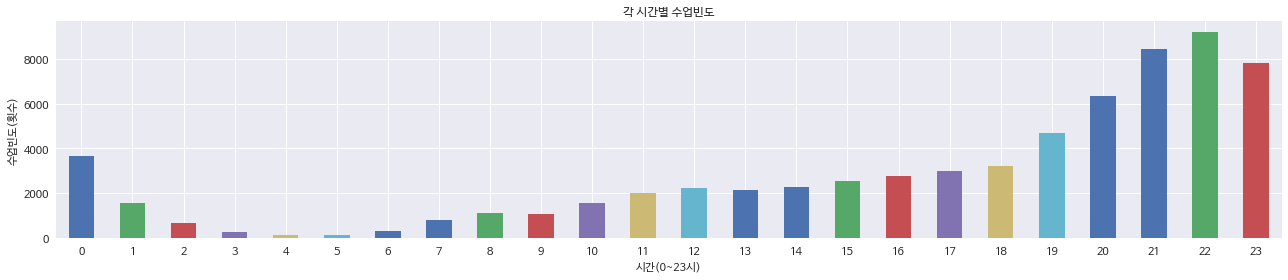

In [12]:
# 시각화

xlabel, ylabel = '시간(0~23시)', '수업빈도(횟수)'
ax = by_hour.plot(figsize = [18,4], fontsize = 11, kind = 'bar', rot = 0)
ax.set(title = '각 시간별 수업빈도', xlabel= xlabel, ylabel= ylabel)
plt.tight_layout()

print('가장많은 학습이 일어나는 시간대는', by_hour.idxmax(),'~', by_hour.idxmax()+1, '시 이며 총 ', by_hour.max(), '회 발생하였습니다')
print('가장적은 학습이 일어나는 시간대는', by_hour.idxmin(),'~', by_hour.idxmin()+1, '시 이며 총 ', by_hour.min(), '회 발생하였습니다')

In [13]:
by_hour.describe()

count      24.000000
mean     2823.250000
std      2649.393126
min       112.000000
25%       984.750000
50%      2176.000000
75%      3310.250000
max      9208.000000
Name: 각 시간별 수업빈도, dtype: float64

## 2) 가장 많은 / 적은 학습이 일어나는 요일

- '가장많은 / 적은 학습' 이라는 것의 정의가 필요<br>
  : 여기서는 요일당 학습 빈도로 학습의 양을 정의

In [14]:
df5 = df3.copy()
by_weekday = df5['수업 시간(초)'].groupby(df4.index.dayofweek).count()
by_weekday.name = '요일별 수업빈도'
by_weekday.index = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
by_weekday

월요일    10578
화요일    11038
수요일    10685
목요일    10519
금요일     9659
토요일     7560
일요일     7719
Name: 요일별 수업빈도, dtype: int64

가장많은 학습이 일어나는 요일은 화요일 이며 총 11038 회 발생하였습니다
가장적은 학습이 일어나는 요일은 토요일 이며 총 7560 회 발생하였습니다


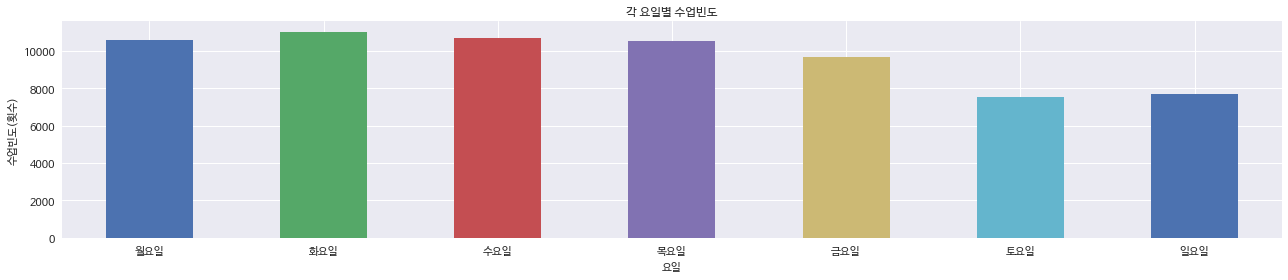

In [15]:
# 시각화

xlabel, ylabel = '요일', '수업빈도(횟수)'
ax = by_weekday.plot(figsize = [18,4], fontsize = 11, kind = 'bar', rot = 0)
ax.set(title = '각 요일별 수업빈도', xlabel= xlabel, ylabel= ylabel)
plt.tight_layout()

print('가장많은 학습이 일어나는 요일은', by_weekday.idxmax(),'이며 총', by_weekday.max(), '회 발생하였습니다')
print('가장적은 학습이 일어나는 요일은', by_weekday.idxmin(),'이며 총', by_weekday.min(), '회 발생하였습니다')

## 3) 꾸준히 학습하는(1주일에 4일 이상) 집단의 평균 학습 횟수, 수업 시간

In [16]:
df6 = df3.copy()
df6['count'] = 1
df6.head()

,학생 idx,튜터 idx,튜터타입,수업 시간(초),count
수업 시작시간,,,,,
2017-09-01 00:02:42,23545,33082,Global,1201.0,1
2017-09-01 00:02:52,48258,31107,Global,1201.0,1
2017-09-01 00:06:30,122633,530,Native,1202.0,1
2017-09-01 00:06:30,112318,66655,Global,1198.0,1
2017-09-01 00:09:03,141632,39902,Global,902.0,1


In [17]:
df6 = df6[['학생 idx', '수업 시간(초)', 'count']]
df7 = df6.copy()
df7 = df7.groupby('학생 idx').resample('W').agg({'수업 시간(초)' : 'mean' , 'count' : 'sum'})
df7.head()

수업 시간(초)  count
학생 idx 수업 시작시간                    
555    2017-12-10     289.0      1
646    2017-12-03    1202.0      1
674    2017-12-31    1202.0      1
713    2017-11-05    1162.0      2
       2017-11-12       NaN      0

In [18]:
df7 = df7[df7['count'] > 3]
df7

수업 시간(초)  count
학생 idx 수업 시작시간                       
713    2017-11-19  1200.250000      4
773    2017-10-15  1149.428571      7
       2017-10-22  1200.500000      4
965    2017-11-26   896.000000      4
       2017-12-03   902.000000      9
       2017-12-10  1201.500000      6
       2017-12-17  1014.125000      8
       2017-12-24   862.833333      6
       2017-12-31   721.000000      5
1004   2017-10-01  1105.000000      4
       2017-12-17  1201.500000      4
1366   2017-09-17  1170.700000     10
1548   2017-10-01  1540.714286      7
       2017-10-22  1463.545455     11
       2017-10-29  1556.400000     10
       2017-11-05   886.250000      4
       2017-11-19  1441.000000      5
       2017-12-17   952.600000      5
       2017-12-24   900.000000      4
1849   2017-10-01  1198.600000      5
1862   2017-09-10   981.272727     11
       2017-10-08   885.250000     12
       2017-10-15  1071.500000     10
2538   2017-11-12  1018.600000      5
       2017-11-19  1201.142857      7
2626   2017-10-22   477.200000      5
2891   2017-10-08  1200.000000      4
3029   2017-09-03  1200.000000      4
       2017-09-10   822.000000      7
3042   2017-11-26   629.833333      6
...                        ...    ...
308282 2017-12-24   951.333333      6
       2017-12-31  1132.750000      4
308747 2017-12-31   976.500000      4
309293 2017-12-31   860.888889      9
309447 2017-12-31   993.833333      6
309565 2017-12-31  1029.571429      7
309871 2017-12-31  1150.500000      6
311142 2017-12-31  1149.333333      6
312605 2017-12-31   959.200000      5
312910 2017-12-31   901.200000      5
313023 2017-12-31  1137.200000      5
313130 2017-12-31   750.833333      6
314322 2017-12-31   791.500000      4
314426 2017-12-31   847.666667      9
315541 2017-12-31   899.250000      4
316012 2017-12-31  1095.500000      4
316217 2017-12-31  1054.200000      5
316808 2017-12-31  1092.857143     14
316946 2017-12-31  1169.700000     10
317164 2017-12-31   928.800000     20
318842 2017-12-31   661.400000      5
319395 2017-12-31  1140.800000      5
319653 2017-12-31   902.500000      8
319661 2017-12-31   445.800000      5
320545 2017-12-31   898.750000      4
320627 2017-12-31   816.000000      5
320914 2017-12-31   799.750000      4
321910 2017-12-31   600.750000      8
323259 2017-12-31   825.750000      4
323867 2017-12-31  1126.250000      4

[6269 rows x 2 columns]

In [19]:
df7.describe()

,수업 시간(초),count
count,6269.000000,6269.000000
mean,1022.825729,6.350933
std,252.460308,3.953461
min,270.500000,4.000000
25%,894.250000,4.000000
50%,1028.250000,5.000000
75%,1199.500000,7.000000
max,2402.250000,120.000000
